<a href="https://colab.research.google.com/github/Junkicch/GatoPretoVsCaramelo/blob/main/GatoPretoXCaramelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [ ]:
(train_ds, val_ds), ds_info = tfds.load(
    "cats_vs_dogs",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.9Q61N3_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
IMG_SIZE = 160

def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

train_ds = train_ds.map(format_image).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(format_image).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
global_avg = tf.keras.layers.GlobalAveragePooling2D()
output_layer = tf.keras.layers.Dense(1, activation="sigmoid")

model = tf.keras.Sequential([
    base_model,
    global_avg,
    output_layer
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=5,
    validation_data=val_ds
)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 564s 958ms/step - accuracy: 0.7341 - loss: 0.5233 - val_accuracy: 0.9559 - val_loss: 0.1491
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 523s 896ms/step - accuracy: 0.9592 - loss: 0.1318 - val_accuracy: 0.9678 - val_loss: 0.1015
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 528s 904ms/step - accuracy: 0.9693 - loss: 0.0937 - val_accuracy: 0.9714 - val_loss: 0.0855
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 524s 898ms/step - accuracy: 0.9724 - loss: 0.0808 - val_accuracy: 0.9738 - val_loss: 0.0759
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 561s 962ms/step - accuracy: 0.9757 - loss: 0.0711 - val_accuracy: 0.9744 - val_loss: 0.0709


In [ ]:
base_model.trainable = True
fine_tune_at = 100  # liberar camadas finais
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_fine = model.fit(
    train_ds,
    epochs=5,
    validation_data=val_ds
)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 863s 1s/step - accuracy: 0.8965 - loss: 0.2300 - val_accuracy: 0.9731 - val_loss: 0.0778
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 851s 1s/step - accuracy: 0.9677 - loss: 0.0856 - val_accuracy: 0.9753 - val_loss: 0.0684
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 808s 1s/step - accuracy: 0.9773 - loss: 0.0610 - val_accuracy: 0.9779 - val_loss: 0.0599
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 846s 1s/step - accuracy: 0.9799 - loss: 0.0498 - val_accuracy: 0.9759 - val_loss: 0.0630
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 852s 1s/step - accuracy: 0.9853 - loss: 0.0397 - val_accuracy: 0.9774 - val_loss: 0.0614


In [ ]:
loss, acc = model.evaluate(val_ds)
print(f"Val Loss: {loss:.4f} | Val Accuracy: {acc:.4f}")

146/146 ━━━━━━━━━━━━━━━━━━━━ 104s 711ms/step - accuracy: 0.9781 - loss: 0.0554
Val Loss: 0.0614 | Val Accuracy: 0.9774


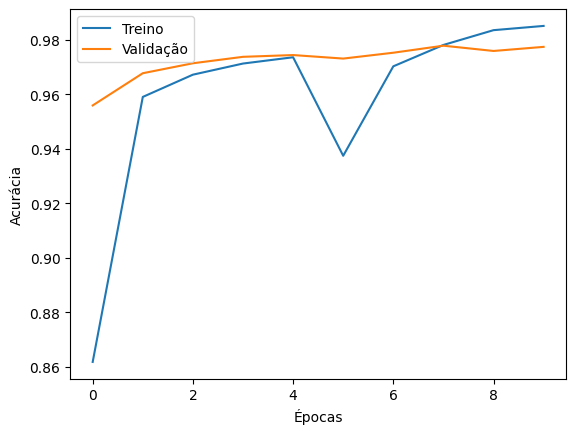

In [ ]:
acc_all = history.history['accuracy'] + history_fine.history['accuracy']
val_acc_all = history.history['val_accuracy'] + history_fine.history['val_accuracy']

plt.plot(acc_all, label="Treino")
plt.plot(val_acc_all, label="Validação")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
É um gato 🐱 (confiança 67.57%)


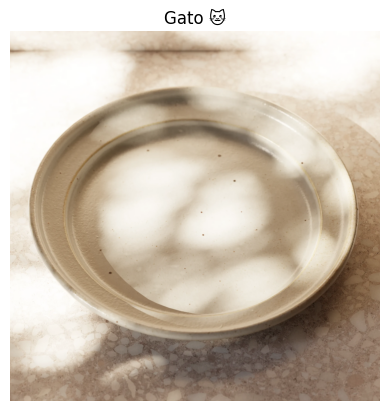

In [ ]:


# Caminho da imagem (faça upload no Colab ou use uma URL)
img_path = "./image/2000px.webp"

# 1. Carregar imagem
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))

# 2. Converter para array e normalizar
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # formato (1, 160, 160, 3)

# 3. Fazer previsão
pred = model.predict(img_array)

# 4. Interpretar resultado
if pred[0][0] > 0.5:
    print(f"É um cachorro 🐶 (confiança {pred[0][0]*100:.2f}%)")
else:
    print(f"É um gato 🐱 (confiança {(1-pred[0][0])*100:.2f}%)")




img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis("off")
plt.title("Cachorro 🐶" if pred[0][0] > 0.5 else "Gato 🐱")
plt.show()
